#  1. 베이스 코드(의사결정나무 회귀)

In [90]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [91]:
# 시계열 관련 데이터평가에 많이 사용됨. 값이 작으면 작을수록 용이. MAE를 정규화 한것
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    
    return score

In [92]:
g_train = pd.read_csv('./train.csv')
g_test = pd.read_csv('./test.csv')
sub_df = pd.read_csv('./sample_submission.csv')
g_train

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,TRAIN_2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,TRAIN_2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,TRAIN_2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,TRAIN_2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


In [93]:
g_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Columns: 184 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), int64(1), object(1)
memory usage: 3.1+ MB


In [94]:
g_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Columns: 183 entries, ID to 2022-11-28 엽록소
dtypes: float64(182), object(1)
memory usage: 3.1+ MB


In [95]:
X_train = g_train.drop(['ID','착과량(int)'], axis=1)
y_train = g_train['착과량(int)']

In [96]:
from sklearn.tree import DecisionTreeRegressor

gam_dt = DecisionTreeRegressor()

gam_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [97]:
dt_pred = gam_dt.predict(g_test.drop(['ID'], axis=1))

In [98]:
y_train.info

<bound method Series.info of 0       692
1       534
2       634
3       639
4       496
       ... 
2202    119
2203    611
2204    650
2205    363
2206     17
Name: 착과량(int), Length: 2207, dtype: int64>

In [99]:
dt_ch = sub_df.drop(['ID'],axis=1)
dt_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   착과량(int)  2208 non-null   int64
dtypes: int64(1)
memory usage: 17.4 KB


In [100]:
sub_df['착과량(int)'] = dt_pred
sub_df.to_csv('./dt_submit.csv')
sub_df

,ID,착과량(int)
0,TEST_0000,260.0
1,TEST_0001,758.0
2,TEST_0002,101.0
3,TEST_0003,483.0
4,TEST_0004,687.0
...,...,...
2203,TEST_2203,734.0
2204,TEST_2204,337.0
2205,TEST_2205,352.0
2206,TEST_2206,285.0


# 2. 데이터 탐색

In [101]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
g_train.dtypes

ID                 object
착과량(int)            int64
수고(m)             float64
수관폭1(min)         float64
수관폭2(max)         float64
                   ...   
2022-11-24 엽록소    float64
2022-11-25 엽록소    float64
2022-11-26 엽록소    float64
2022-11-27 엽록소    float64
2022-11-28 엽록소    float64
Length: 184, dtype: object

In [103]:
for col in g_train.columns:
	print(col)

ID
착과량(int)
수고(m)
수관폭1(min)
수관폭2(max)
수관폭평균
2022-09-01 새순
2022-09-02 새순
2022-09-03 새순
2022-09-04 새순
2022-09-05 새순
2022-09-06 새순
2022-09-07 새순
2022-09-08 새순
2022-09-09 새순
2022-09-10 새순
2022-09-11 새순
2022-09-12 새순
2022-09-13 새순
2022-09-14 새순
2022-09-15 새순
2022-09-16 새순
2022-09-17 새순
2022-09-18 새순
2022-09-19 새순
2022-09-20 새순
2022-09-21 새순
2022-09-22 새순
2022-09-23 새순
2022-09-24 새순
2022-09-25 새순
2022-09-26 새순
2022-09-27 새순
2022-09-28 새순
2022-09-29 새순
2022-09-30 새순
2022-10-01 새순
2022-10-02 새순
2022-10-03 새순
2022-10-04 새순
2022-10-05 새순
2022-10-06 새순
2022-10-07 새순
2022-10-08 새순
2022-10-09 새순
2022-10-10 새순
2022-10-11 새순
2022-10-12 새순
2022-10-13 새순
2022-10-14 새순
2022-10-15 새순
2022-10-16 새순
2022-10-17 새순
2022-10-18 새순
2022-10-19 새순
2022-10-20 새순
2022-10-21 새순
2022-10-22 새순
2022-10-23 새순
2022-10-24 새순
2022-10-25 새순
2022-10-26 새순
2022-10-27 새순
2022-10-28 새순
2022-10-29 새순
2022-10-30 새순
2022-10-31 새순
2022-11-01 새순
2022-11-02 새순
2022-11-03 새순
2022-11-04 새순
2022-11-05 새순
2022-11-06 새순
2022-11-07 새순
2022

In [104]:
# 오브젝트열 제거
g_ctrain = g_train.drop(["ID"], axis=1)
g_ctrain.describe()

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
count,2207.000000,2207.00000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,...,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,406.222474,243.72995,315.186226,358.824196,337.005211,3.774807,3.736928,3.701495,3.663435,3.627503,...,68.992036,68.890661,68.791536,68.692934,68.593709,68.493569,68.393050,68.291350,68.192009,68.093096
std,218.978302,35.88914,66.327994,68.862898,64.859684,0.774181,0.764067,0.754751,0.745394,0.733896,...,4.124586,4.124429,4.125817,4.128586,4.130005,4.130072,4.131859,4.134976,4.135591,4.136995
min,1.000000,95.00000,95.000000,123.000000,109.000000,2.300000,2.200000,2.200000,2.200000,2.200000,...,54.246243,54.154888,54.143798,54.028089,53.884892,53.695860,53.649032,53.644994,53.450069,53.379849
25%,221.000000,223.00000,271.500000,313.500000,294.000000,3.100000,3.100000,3.050000,3.000000,3.000000,...,66.195524,66.075372,65.995234,65.906703,65.765257,65.691065,65.609606,65.487863,65.374528,65.278624
50%,404.000000,243.00000,316.000000,364.000000,340.500000,3.800000,3.700000,3.700000,3.700000,3.600000,...,69.048956,68.920295,68.841060,68.731164,68.647716,68.514740,68.392436,68.292889,68.207648,68.102235
75%,593.500000,267.00000,361.000000,402.000000,380.000000,4.400000,4.400000,4.300000,4.300000,4.300000,...,71.740281,71.615746,71.504264,71.390195,71.311027,71.227033,71.152030,71.038257,70.947707,70.850934
max,799.000000,381.00000,559.000000,584.000000,571.500000,5.300000,5.300000,5.200000,5.200000,5.100000,...,83.363883,83.227379,83.036103,82.978876,82.842139,82.722266,82.575149,82.491041,82.371832,82.321938


In [105]:
g_train.corr()

<ipython-input-105-2f31efdb8165>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g_train.corr()


,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
착과량(int),1.000000,0.007002,0.021279,0.037168,0.030611,-0.980777,-0.980766,-0.980633,-0.980772,-0.980526,...,-0.011129,-0.011098,-0.010823,-0.010763,-0.011184,-0.010697,-0.010635,-0.010350,-0.010035,-0.009969
수고(m),0.007002,1.000000,0.456394,0.484295,0.490456,-0.004329,-0.004161,-0.004863,-0.003260,-0.004864,...,0.021695,0.021659,0.021937,0.022443,0.022312,0.022316,0.022915,0.022803,0.022593,0.022428
수관폭1(min),0.021279,0.456394,1.000000,0.841330,0.957948,-0.017625,-0.015392,-0.017317,-0.015037,-0.017852,...,0.001020,0.001268,0.001151,0.001077,0.000732,0.000701,0.001012,0.000971,0.000502,0.000599
수관폭2(max),0.037168,0.484295,0.841330,1.000000,0.961049,-0.032941,-0.031595,-0.032226,-0.031397,-0.032521,...,-0.007773,-0.007796,-0.007836,-0.008202,-0.008366,-0.008514,-0.008198,-0.008068,-0.008396,-0.008324
수관폭평균,0.030611,0.490456,0.957948,0.961049,1.000000,-0.026499,-0.024643,-0.025962,-0.024356,-0.026392,...,-0.003605,-0.003490,-0.003571,-0.003804,-0.004067,-0.004161,-0.003835,-0.003786,-0.004200,-0.004113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24 엽록소,-0.010697,0.022316,0.000701,-0.008514,-0.004161,0.012965,0.011446,0.009071,0.012051,0.010318,...,0.999530,0.999619,0.999704,0.999803,0.999902,1.000000,0.999903,0.999806,0.999717,0.999623
2022-11-25 엽록소,-0.010635,0.022915,0.001012,-0.008198,-0.003835,0.012901,0.011357,0.008985,0.011960,0.010241,...,0.999425,0.999513,0.999597,0.999697,0.999799,0.999903,1.000000,0.999901,0.999808,0.999715
2022-11-26 엽록소,-0.010350,0.022803,0.000971,-0.008068,-0.003786,0.012622,0.011072,0.008711,0.011672,0.009955,...,0.999336,0.999428,0.999507,0.999607,0.999705,0.999806,0.999901,1.000000,0.999899,0.999802
2022-11-27 엽록소,-0.010035,0.022593,0.000502,-0.008396,-0.004200,0.012248,0.010720,0.008370,0.011297,0.009618,...,0.999252,0.999343,0.999422,0.999521,0.999615,0.999717,0.999808,0.999899,1.000000,0.999902


<Axes: xlabel='수고(m)', ylabel='착과량(int)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.

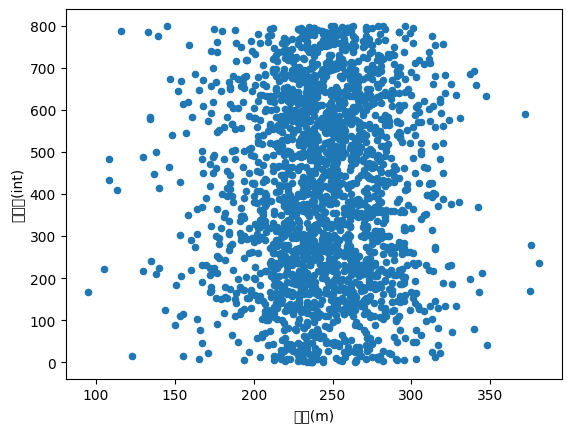

In [106]:
g_train.plot(x='수고(m)', y='착과량(int)', kind='scatter')

<Axes: xlabel='수관폭1(min)', ylabel='착과량(int)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


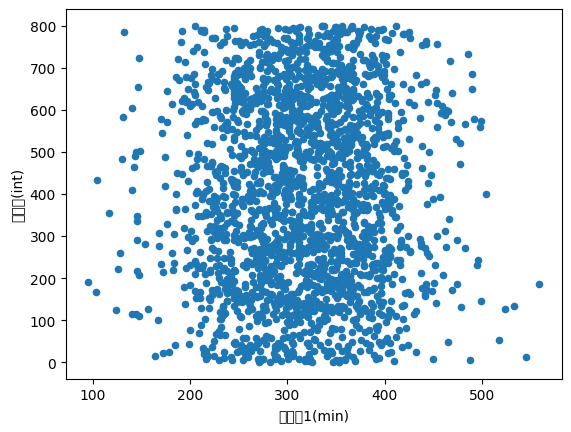

In [107]:
g_train.plot(x='수관폭1(min)', y='착과량(int)', kind='scatter')

<Axes: xlabel='수관폭2(max)', ylabel='착과량(int)'>

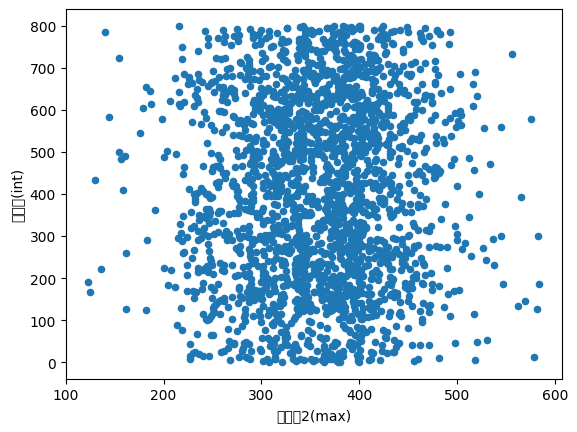

In [108]:
g_train.plot(x='수관폭2(max)', y='착과량(int)', kind='scatter')

<Axes: xlabel='수관폭평균', ylabel='착과량(int)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


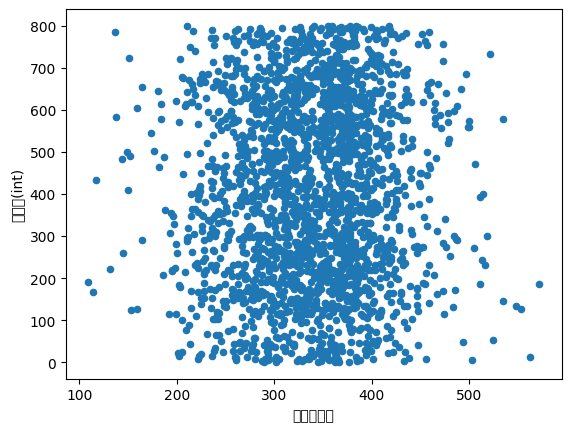

In [109]:
g_train.plot(x='수관폭평균', y='착과량(int)', kind='scatter')

상관관계표나 그래프를 봐도 수고, 수관폭과는 상관관계가 없는 것으로 보인다.

## 착과량과 새순, 엽록소의 상관관계 알아보기

In [110]:
gam_id = g_test['ID']

In [111]:
gam_test_sae = g_test.iloc[:,5:94]

In [112]:
# 새순만 포함하는 테스트 df 생성
gamsae_test = pd.concat([gam_id, gam_test_sae], axis=1)
gamsae_test

,ID,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,TEST_0000,4.3,4.2,4.2,4.1,4.1,4.1,4.0,4.0,3.9,...,0.8,0.8,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0
1,TEST_0001,2.5,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.4,...,0.8,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6
2,TEST_0002,4.7,4.7,4.6,4.6,4.5,4.5,4.4,4.4,4.3,...,0.9,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0
3,TEST_0003,3.6,3.6,3.6,3.6,3.5,3.5,3.4,3.4,3.4,...,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.6,0.5,0.0
4,TEST_0004,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,2.5,...,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,TEST_2203,2.5,2.5,2.4,2.4,2.4,2.4,2.3,2.3,2.3,...,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6
2204,TEST_2204,4.1,4.1,4.1,4.0,4.0,3.9,3.9,3.8,3.8,...,0.8,0.8,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0
2205,TEST_2205,3.8,3.8,3.8,3.7,3.7,3.7,3.6,3.6,3.5,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6
2206,TEST_2206,4.5,4.4,4.4,4.3,4.3,4.2,4.2,4.2,4.1,...,0.9,0.8,0.8,0.7,0.7,0.7,0.6,0.5,0.0,0.0


In [113]:
# 새순, 엽록소 데이터프레임에 각각 공통적으로 붙여줄 착과량 열
gam_ch = g_train['착과량(int)']

In [114]:
#위의 전체df 상관관계는 새순의 월이 잘려 착과량과 새순과의 상관관계를 보기 힘들었기 때문에, 따로 상관관계표를 생성
gam_sae = g_train.iloc[:,6:95]
gam_sae

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,...,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6
1,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,...,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0,0.0,0.0
2,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,2.7,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
3,3.1,3.0,3.0,3.0,3.0,2.9,2.9,2.9,2.8,2.8,...,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7
4,3.7,3.6,3.6,3.6,3.5,3.5,3.5,3.4,3.4,3.3,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,4.7,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.2,4.2,...,0.8,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0
2203,3.1,3.0,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6
2204,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
2205,3.9,3.9,3.8,3.8,3.8,3.7,3.7,3.6,3.6,3.6,...,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.5,0.0


In [115]:
# 9월 ~ 11월 새순데이터를 보면 점점 줄어 드는 것을 볼 수 있다.
gam_chsae = pd.concat([gam_ch, gam_sae], axis=1)
gam_chsae

,착과량(int),2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,692,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,...,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6
1,534,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,...,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0,0.0,0.0
2,634,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
3,639,3.1,3.0,3.0,3.0,3.0,2.9,2.9,2.9,2.8,...,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7
4,496,3.7,3.6,3.6,3.6,3.5,3.5,3.5,3.4,3.4,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,119,4.7,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.2,...,0.8,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0
2203,611,3.1,3.0,3.0,3.0,2.9,2.9,2.9,2.9,2.8,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6
2204,650,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
2205,363,3.9,3.9,3.8,3.8,3.8,3.7,3.7,3.6,3.6,...,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.5,0.0


In [116]:
gam_chsae_id = pd.concat([gam_ch, gam_sae], axis=1)
gam_chsae

,착과량(int),2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,692,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,...,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6
1,534,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,...,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0,0.0,0.0
2,634,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
3,639,3.1,3.0,3.0,3.0,3.0,2.9,2.9,2.9,2.8,...,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7
4,496,3.7,3.6,3.6,3.6,3.5,3.5,3.5,3.4,3.4,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,119,4.7,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.2,...,0.8,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0
2203,611,3.1,3.0,3.0,3.0,2.9,2.9,2.9,2.9,2.8,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6
2204,650,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
2205,363,3.9,3.9,3.8,3.8,3.8,3.7,3.7,3.6,3.6,...,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.5,0.0


In [117]:
gam_chsae.corr()

,착과량(int),2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
착과량(int),1.000000,-0.980777,-0.980766,-0.980633,-0.980772,-0.980526,-0.980885,-0.980784,-0.980261,-0.980388,...,0.023955,0.185021,0.319915,0.440496,0.557371,0.582726,0.546006,0.603445,0.704241,0.769204
2022-09-01 새순,-0.980777,1.000000,0.998097,0.998532,0.998446,0.998555,0.998277,0.998358,0.998242,0.998249,...,-0.006377,-0.175125,-0.312771,-0.435015,-0.556788,-0.583302,-0.543855,-0.602950,-0.705765,-0.773815
2022-09-02 새순,-0.980766,0.998097,1.000000,0.998091,0.998492,0.998385,0.998564,0.998295,0.998292,0.998213,...,-0.007281,-0.176866,-0.313379,-0.436047,-0.557547,-0.584870,-0.544463,-0.604538,-0.706638,-0.773221
2022-09-03 새순,-0.980633,0.998532,0.998091,1.000000,0.997982,0.998491,0.998386,0.998607,0.998280,0.998256,...,-0.004527,-0.173213,-0.310872,-0.433216,-0.554846,-0.582715,-0.543134,-0.602024,-0.704716,-0.772613
2022-09-04 새순,-0.980772,0.998446,0.998492,0.997982,1.000000,0.998016,0.998393,0.998342,0.998481,0.998144,...,-0.004937,-0.174159,-0.310292,-0.434056,-0.554963,-0.583703,-0.543055,-0.602929,-0.705140,-0.772696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24 새순,0.582726,-0.583302,-0.584870,-0.582715,-0.583703,-0.582164,-0.581884,-0.580209,-0.580103,-0.579522,...,0.569140,0.672920,0.721824,0.768195,0.773578,1.000000,0.776372,0.703639,0.763610,0.718314
2022-11-25 새순,0.546006,-0.543855,-0.544463,-0.543134,-0.543055,-0.542479,-0.541295,-0.541469,-0.539715,-0.540602,...,0.501440,0.601580,0.654017,0.730658,0.712132,0.776372,1.000000,0.793676,0.641779,0.620444
2022-11-26 새순,0.603445,-0.602950,-0.604538,-0.602024,-0.602929,-0.602807,-0.600388,-0.601674,-0.599383,-0.600311,...,0.507410,0.551829,0.677823,0.669184,0.781665,0.703639,0.793676,1.000000,0.782669,0.630256
2022-11-27 새순,0.704241,-0.705765,-0.706638,-0.704716,-0.705140,-0.704794,-0.703841,-0.703779,-0.703133,-0.702721,...,0.436292,0.543849,0.622121,0.704206,0.734260,0.763610,0.641779,0.782669,1.000000,0.815546


In [118]:
# 그림이 너무 작아 개별적으로 다운로드해서 확대해서 정보를 봤다
#plt.rc('font', family='NanumBarunGothic')
#plt.figure(figsize=(500,500))
#sns.heatmap(data = gam_chsae.corr(), annot=True, 
#fmt = '.2f', linewidths=.5, cmap='Blues')

9월 새순과는 음의 상관관계를 보이며 11월에 가까워 질수록 양의 상관관계로 상승하는 것을 볼 수 있다. <br>이는 귤이 겨울이 제철인 과일이라 그런것으로 보인다.

이제 착과량 과 엽록소와의 상관관계를 보겠다.

In [119]:
gam_yup = g_train.iloc[:,95:184]
gam_yup

,2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,2022-09-10 엽록소,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,78.336504,78.243462,78.166501,78.127526,78.058021,77.915689,77.861660,77.746645,77.592138,77.572477,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,80.116691,79.974397,79.890399,79.709278,79.531061,79.348139,79.151023,79.128739,79.084197,78.924476,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,79.118529,78.941452,78.928197,78.741878,78.713691,78.654247,78.461743,78.323264,78.219696,78.123820,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,77.936262,77.839523,77.815607,77.644644,77.546555,77.480441,77.383665,77.282036,77.126354,77.121300,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,76.233231,76.186572,76.031032,75.886553,75.736449,75.735036,75.642223,75.458496,75.380945,75.272054,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,74.024614,73.876933,73.853205,73.721799,73.666974,73.540144,73.449933,73.349051,73.310852,73.273704,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,81.920876,81.898801,81.769536,81.607251,81.456723,81.408951,81.312932,81.181893,81.027196,81.010124,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,75.486518,75.451905,75.315223,75.252547,75.186170,75.099348,75.093451,75.050447,74.877088,74.711044,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,74.110017,74.017373,73.886675,73.720486,73.712709,73.532512,73.352104,73.230786,73.183439,73.006241,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


In [120]:
gam_chyup = pd.concat([gam_ch, gam_yup], axis=1)
gam_chyup

,착과량(int),2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,692,78.336504,78.243462,78.166501,78.127526,78.058021,77.915689,77.861660,77.746645,77.592138,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,534,80.116691,79.974397,79.890399,79.709278,79.531061,79.348139,79.151023,79.128739,79.084197,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,634,79.118529,78.941452,78.928197,78.741878,78.713691,78.654247,78.461743,78.323264,78.219696,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,639,77.936262,77.839523,77.815607,77.644644,77.546555,77.480441,77.383665,77.282036,77.126354,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,496,76.233231,76.186572,76.031032,75.886553,75.736449,75.735036,75.642223,75.458496,75.380945,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,119,74.024614,73.876933,73.853205,73.721799,73.666974,73.540144,73.449933,73.349051,73.310852,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,611,81.920876,81.898801,81.769536,81.607251,81.456723,81.408951,81.312932,81.181893,81.027196,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,650,75.486518,75.451905,75.315223,75.252547,75.186170,75.099348,75.093451,75.050447,74.877088,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,363,74.110017,74.017373,73.886675,73.720486,73.712709,73.532512,73.352104,73.230786,73.183439,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


In [121]:
gam_chyup.corr()

,착과량(int),2022-09-01 엽록소,2022-09-02 엽록소,2022-09-03 엽록소,2022-09-04 엽록소,2022-09-05 엽록소,2022-09-06 엽록소,2022-09-07 엽록소,2022-09-08 엽록소,2022-09-09 엽록소,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
착과량(int),1.000000,-0.005808,-0.005789,-0.005748,-0.006301,-0.006334,-0.006577,-0.006613,-0.006451,-0.006508,...,-0.011129,-0.011098,-0.010823,-0.010763,-0.011184,-0.010697,-0.010635,-0.010350,-0.010035,-0.009969
2022-09-01 엽록소,-0.005808,1.000000,0.999901,0.999808,0.999707,0.999623,0.999520,0.999414,0.999310,0.999204,...,0.991986,0.991862,0.991744,0.991717,0.991676,0.991626,0.991553,0.991419,0.991359,0.991261
2022-09-02 엽록소,-0.005789,0.999901,1.000000,0.999900,0.999804,0.999711,0.999612,0.999511,0.999401,0.999292,...,0.992099,0.991974,0.991858,0.991825,0.991786,0.991740,0.991673,0.991535,0.991472,0.991376
2022-09-03 엽록소,-0.005748,0.999808,0.999900,1.000000,0.999901,0.999807,0.999705,0.999602,0.999496,0.999394,...,0.992180,0.992054,0.991939,0.991909,0.991863,0.991809,0.991747,0.991612,0.991550,0.991453
2022-09-04 엽록소,-0.006301,0.999707,0.999804,0.999901,1.000000,0.999899,0.999803,0.999705,0.999594,0.999492,...,0.992239,0.992120,0.992007,0.991983,0.991938,0.991877,0.991814,0.991676,0.991612,0.991516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24 엽록소,-0.010697,0.991626,0.991740,0.991809,0.991877,0.992014,0.992133,0.992226,0.992363,0.992498,...,0.999530,0.999619,0.999704,0.999803,0.999902,1.000000,0.999903,0.999806,0.999717,0.999623
2022-11-25 엽록소,-0.010635,0.991553,0.991673,0.991747,0.991814,0.991945,0.992064,0.992152,0.992289,0.992429,...,0.999425,0.999513,0.999597,0.999697,0.999799,0.999903,1.000000,0.999901,0.999808,0.999715
2022-11-26 엽록소,-0.010350,0.991419,0.991535,0.991612,0.991676,0.991808,0.991933,0.992023,0.992161,0.992296,...,0.999336,0.999428,0.999507,0.999607,0.999705,0.999806,0.999901,1.000000,0.999899,0.999802
2022-11-27 엽록소,-0.010035,0.991359,0.991472,0.991550,0.991612,0.991744,0.991863,0.991953,0.992091,0.992234,...,0.999252,0.999343,0.999422,0.999521,0.999615,0.999717,0.999808,0.999899,1.000000,0.999902


엽록소가 햇빛, 광합성과 관련이 있어 착과량과 상관관계가 높을 줄 알았는데, 결과를 보니 엽록소와의 유의미한 상관관계는 없다고 볼 수 있을 것 같다.

# 3. 모델링 적용(새순, 엽록소 포함)

그나마 유의미하다고 판단되는 gam_chsae(착과량과 새순)와 그냥 학습데이터 이 두가지 경우를 나누어서 모델링을 적용해볼 계획이다. <br>지금 단계는 데이터의 구분 없이 모든 열을 포함한 데이터의 결과를 보는 것.

In [122]:
x = g_train.drop(['ID','착과량(int)'], axis=1)
y = g_train['착과량(int)']

In [123]:
#학습용, 테스트용 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=10)

In [124]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(g_train.shape)

(1765, 182)
(442, 182)
(1765,)
(442,)
(2207, 184)


## 3-1 선형회귀, 릿지, 라쏘 적용

In [125]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#from sklearn.metrics import mean_squared_error

# 선형, 릿지, 라쏘
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

lr = lr_reg.fit(x_train, y_train)
rid = ridge_reg.fit(x_train, y_train)
la = lasso_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.040e+04, tolerance: 8.388e+03
  model = cd_fast.enet_coordinate_descent(


선형회귀 적용

In [126]:
lr_pred = lr.predict(x_test)

In [127]:
NMAE(y_test, lr_pred)

0.09030192055492885

릿지 적용

In [128]:
#가중치의 절대값을 작게 만들어 특성이 출력값에 주는 영향을 적게 만듦
rid_pred = rid.predict(x_test)

In [129]:
NMAE(y_test, rid_pred)

0.08953067838818486

라쏘 적용

In [130]:
# 특정값을 0으로 지정하여 제외되는 특성이 생김
la_pred = la.predict(x_test)

In [131]:
NMAE(y_test, la_pred)

0.08805176429235623

In [132]:
la_g_pred = la.predict(g_test.drop(['ID'],axis=1)).round(0)
la_g_pred

array([270., 752., 144., ..., 392., 212., 101.])

In [133]:
la_ch = sub_df.drop(['ID'],axis=1)

In [134]:
sub_df['착과량(int)'] = la_g_pred
sub_df.to_csv('./la_submit.csv')
sub_df

,ID,착과량(int)
0,TEST_0000,270.0
1,TEST_0001,752.0
2,TEST_0002,144.0
3,TEST_0003,445.0
4,TEST_0004,696.0
...,...,...
2203,TEST_2203,759.0
2204,TEST_2204,308.0
2205,TEST_2205,392.0
2206,TEST_2206,212.0


In [135]:
sub_df.mean()

<ipython-input-135-798d01c19a93>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sub_df.mean()


착과량(int)    393.705163
dtype: float64

마지막으로 실행 했을때, 선형, 릿지, 라쏘 모델에서는 라쏘가 NMAE 0.088로 가장 낮은 오차를 보여 주었다.

## 3-2  랜덤포레스트 및 XG부스트

(라이트GBM 모델은 과적합에 민감하여 데이터의 개수가 10000개 이하일 경우 사용하지 않는 것이 좋다는 의견이 존재함)

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
#랜덤포레스트
rfc = RandomForestClassifier(n_estimators=40, max_depth=5,random_state=0)
rfc.fit(x_train,y_train)

rfc_pred = rfc.predict(x_test)

In [138]:
# n_estimator = 40 ~ 100 이하로 설정해야 0.10 밑으로 내려옴. 45의 경우 0.0995, 100의 경우 0.0989로 40이 적당한것으로 보임
NMAE(y_test,rfc_pred)

0.09818929802705914

In [139]:
#from xgboost import XGBRegressor
import xgboost as xgb

In [140]:
# XG부스트
my_xgb = xgb.XGBRegressor(n_estimators = 100)
my_xgb.fit(x_train, y_train)

xgb_pred = my_xgb.predict(x_test)

In [141]:
# 튜닝을 안해도 타 모델에 비해 훨씬 적은 오차를 보여줌. 100이 최저오차를 보여줌
NMAE(y_test,xgb_pred)

0.08185903426686822

In [142]:
from sklearn.metrics import explained_variance_score
xgb_sc = my_xgb.score(x_train, y_train)
print(xgb_sc)
print(explained_variance_score(xgb_pred, y_test))

0.9994907892361925
0.9660055164634587


In [143]:
my_xgb_g_pred = my_xgb.predict(g_test.drop(['ID'],axis=1)).round(0)
my_xgb_g_pred

array([229., 748., 156., ..., 364., 223., 108.], dtype=float32)

In [144]:
xgb_ch = sub_df.drop(['ID'],axis=1)

In [145]:
sub_df['착과량(int)'] = my_xgb_g_pred
sub_df.to_csv('./xgb_submit.csv')
sub_df

,ID,착과량(int)
0,TEST_0000,229.0
1,TEST_0001,748.0
2,TEST_0002,156.0
3,TEST_0003,451.0
4,TEST_0004,684.0
...,...,...
2203,TEST_2203,764.0
2204,TEST_2204,306.0
2205,TEST_2205,364.0
2206,TEST_2206,223.0


In [146]:
sub_df.mean()

<ipython-input-146-798d01c19a93>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sub_df.mean()


착과량(int)    394.514496
dtype: float32

In [147]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50685 (\N{HANGUL SYLLABLE YEOB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*arg

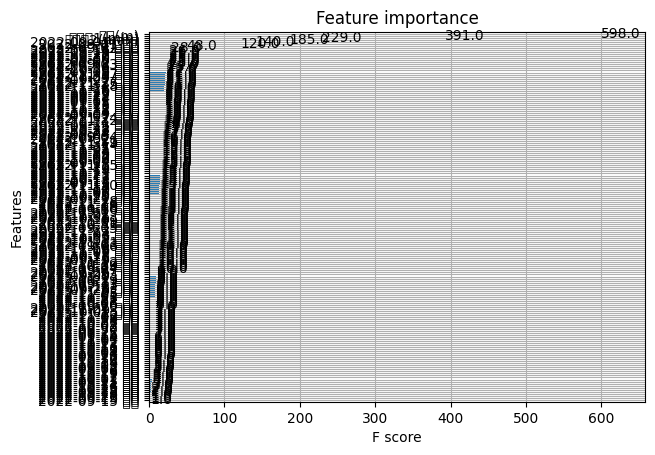

In [148]:
xgb.plot_importance(my_xgb)

# 4. 모델링 적용(새순만 포함) 

In [149]:
cx = gam_chsae.drop(['착과량(int)'], axis=1)
cy = gam_chsae['착과량(int)']

In [150]:
#학습용, 테스트용 데이터 분리
cx_train, cx_test, cy_train, cy_test = train_test_split(cx, cy, train_size=0.8, random_state=10)

## 4-1. 선형회귀, 릿지, 라쏘 적용(새순)

In [151]:
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

clr = lr_reg.fit(cx_train, cy_train)
crid = ridge_reg.fit(cx_train, cy_train)
cla = lasso_reg.fit(cx_train, cy_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.837e+04, tolerance: 8.388e+03
  model = cd_fast.enet_coordinate_descent(


선형회귀 적용(새순)

In [152]:
clr_pred = clr.predict(cx_test)

In [153]:
NMAE(cy_test,clr_pred)

0.08834426117782297

릿지 적용(새순)

In [154]:
crid_pred = crid.predict(cx_test)

In [155]:
NMAE(cy_test, crid_pred)

0.08786253126753839

라쏘 적용(새순)

In [156]:
cla_pred = cla.predict(cx_test)

In [157]:
NMAE(cy_test,cla_pred)

0.08775356687726371

In [158]:
cla_g_pred = cla.predict(gamsae_test.drop(['ID'],axis=1)).round(0)
cla_g_pred

array([269., 753., 145., ..., 391., 213., 101.])

In [159]:
cla_ch = sub_df.drop(['ID'],axis=1)

In [160]:
sub_df['착과량(int)'] = cla_g_pred
sub_df.to_csv('./sae_la_submit.csv')
sub_df

,ID,착과량(int)
0,TEST_0000,269.0
1,TEST_0001,753.0
2,TEST_0002,145.0
3,TEST_0003,446.0
4,TEST_0004,697.0
...,...,...
2203,TEST_2203,760.0
2204,TEST_2204,307.0
2205,TEST_2205,391.0
2206,TEST_2206,213.0


In [161]:
sub_df.mean()

<ipython-input-161-798d01c19a93>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sub_df.mean()


착과량(int)    393.728261
dtype: float64

모든 모델을 사용한 경우 새순만을 포함한 데이터의 오차가 줄어 든것을 볼 수 있지만, 다 0.00n % 내외인것을 볼 수 있다.

## 4-2. 랜덤포레스트 및 XG부스트 적용(새순)

In [162]:
#랜덤포레스트
rfc = RandomForestClassifier(n_estimators=125, max_depth=5,random_state=0)
rfc.fit(cx_train,cy_train)

rfc_c_pred = rfc.predict(cx_test)

In [163]:
# n_estimator = 125의 경우 적은 오차를 보여줌
#랜덤포레스트의 경우 새순만 적용했을때 더 적은 오차를 보여줌
NMAE(y_test,rfc_c_pred)

0.09258046759567751

In [164]:
# XG부스트
my_c_xgb = xgb.XGBRegressor(n_estimators = 15)
my_c_xgb.fit(cx_train, cy_train)

xgb_c_pred = my_c_xgb.predict(cx_test)

In [165]:
# 튜닝을 안해도 타 모델에 비해 적은 오차를 보여준다
NMAE(y_test,xgb_c_pred)

0.07770466134083812

In [167]:
c_xgb_sc = my_c_xgb.score(cx_train, cy_train)
print(c_xgb_sc)
print(explained_variance_score(xgb_c_pred, y_test))

0.982865107176715
0.9697204401155847


In [168]:
#새순만 담긴 테스트파일에 적용
my_c_xgb_g_pred = my_c_xgb.predict(gamsae_test.drop(['ID'],axis=1)).round(0)
my_c_xgb_g_pred

array([249., 755., 157., ..., 384., 233., 122.], dtype=float32)

In [169]:
sae_xgb_ch = sub_df.drop(['ID'],axis=1)

In [170]:
sub_df['착과량(int)'] = my_c_xgb_g_pred
sub_df.to_csv('./my_sae_xgb_submit.csv')
sub_df

,ID,착과량(int)
0,TEST_0000,249.0
1,TEST_0001,755.0
2,TEST_0002,157.0
3,TEST_0003,434.0
4,TEST_0004,665.0
...,...,...
2203,TEST_2203,755.0
2204,TEST_2204,316.0
2205,TEST_2205,384.0
2206,TEST_2206,233.0


In [171]:
sub_df.mean()

<ipython-input-171-798d01c19a93>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sub_df.mean()


착과량(int)    392.170288
dtype: float32

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


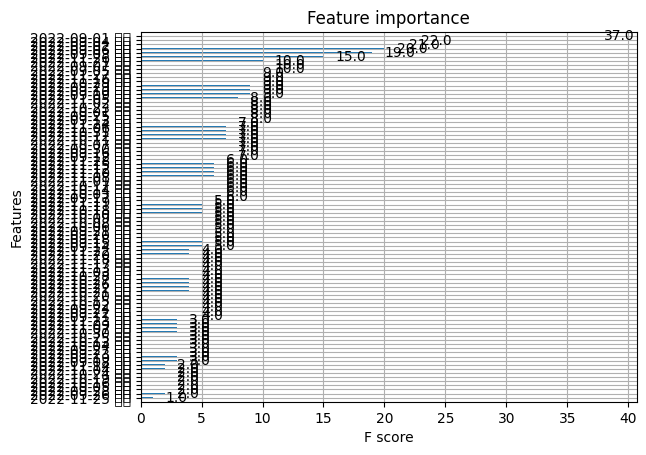

In [172]:
# 변수별 중요도
xgb.plot_importance(my_c_xgb)

# 5. 결과
최종적으로 새순만 적용하여, xg부스트모델을 사용했을때, 착과량 오류가 적은편이었다. <br>그리고 단순히 새순 데이터프레임만 봤을때, 9월 새순데이터의 크기가 크면 클 수록 착과량이 적은것으로 추측할 수 있을 것 같다. <br>100이상의 착과량을 내는 새순의 데이터는 2.8 ~ 3.5 사이로 보인다. 해당 주제에 대해서도 다시 분석 및 시각화를 진행 할 것이며, 수고(m)와 착과량의 상관관계도 분석 할 예정이다.